In [41]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import datetime
import timeit

In [42]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [43]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [44]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [45]:
train_images.shape

(60000, 28, 28)

In [46]:
test_images.shape

(10000, 28, 28)

In [47]:
len(train_labels)

60000

In [48]:
len(test_labels)

10000

In [49]:
train_images[0].shape

(28, 28)

In [50]:
train_images[0][0].shape

(28,)

In [51]:
train_images[0][0][0].shape

()

In [52]:
abc = [[[1, 2], [3, 4], [5, 6]], [[7, 8], [9, 10], [11, 12]]]

In [53]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [54]:
fashion_mnist_log_dir = "logs/fashion-mnist/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=fashion_mnist_log_dir, histogram_freq=1)

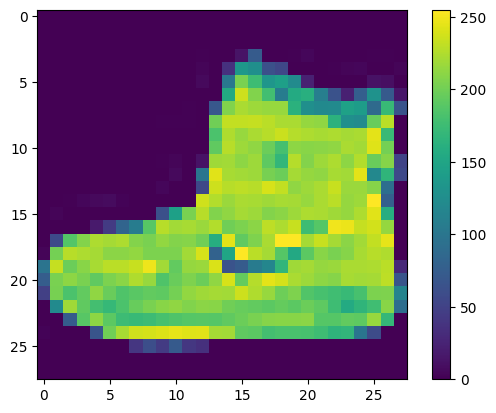

In [55]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [56]:
train_images = train_images / 255.0
test_images = test_images / 255.0

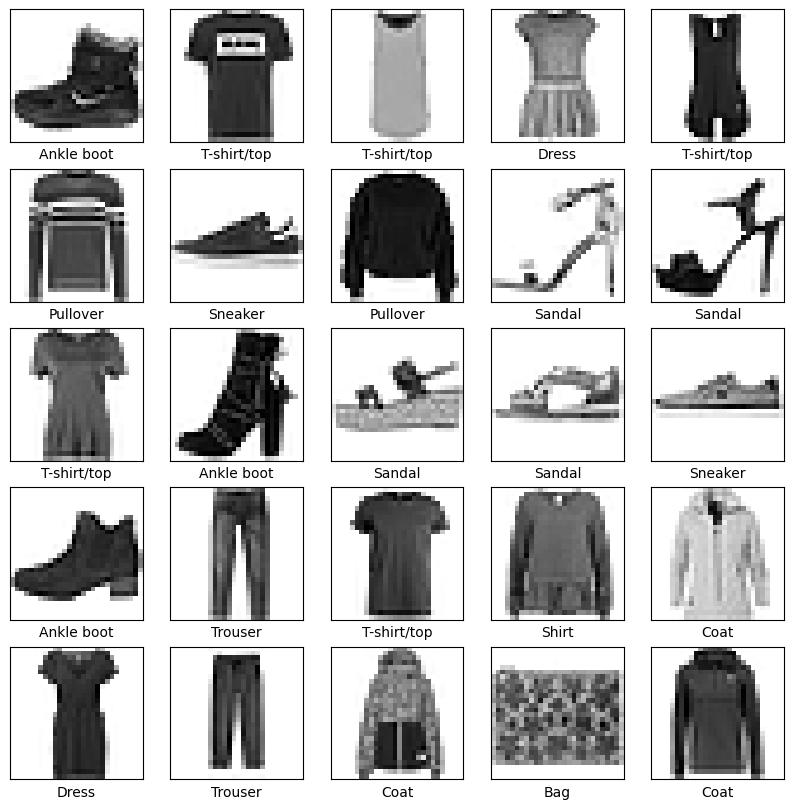

In [57]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

C:\sources\setmy.info\submodules\setmy-info.github.io\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [60]:
#model.fit(train_images, train_labels, epochs=10)
model.fit(x=train_images, 
          y=train_labels, 
          epochs=10, 
          validation_data=(test_images, test_labels), 
          callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7786 - loss: 0.6350 - val_accuracy: 0.8409 - val_loss: 0.4500
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8595 - loss: 0.3869 - val_accuracy: 0.8509 - val_loss: 0.4008
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8772 - loss: 0.3353 - val_accuracy: 0.8672 - val_loss: 0.3684
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8860 - loss: 0.3088 - val_accuracy: 0.8708 - val_loss: 0.3572
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8927 - loss: 0.2910 - val_accuracy: 0.8684 - val_loss: 0.3638
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8969 - loss: 0.2784 - val_accuracy: 0.8800 - val_loss: 0.3436
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9028 - loss: 0.2667 - val_accuracy: 0.8791 - val_loss: 0.3436
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9043 - loss: 0.2538 - 

In [61]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - 816us/step - accuracy: 0.8803 - loss: 0.3415

Test accuracy: 0.880299985408783


In [62]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [81]:
models_dir = r'./fashion-models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

In [83]:
model.save(models_dir + '/fashion_mnist_model')

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=./fashion-models/fashion_mnist_model.

In [84]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [85]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [86]:
predictions[0]

array([3.88375838e-08, 1.84217835e-10, 2.62252664e-10, 1.12359094e-10,
       4.49783238e-10, 8.08930490e-05, 2.89876323e-09, 1.16812030e-03,
       3.62281471e-09, 9.98751044e-01], dtype=float32)

In [87]:
np.argmax(predictions[0])

np.int64(9)

In [88]:
test_labels[0]

np.uint8(9)

In [89]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


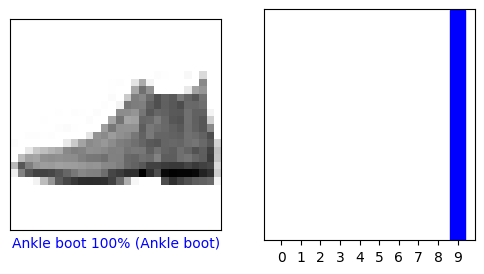

In [90]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

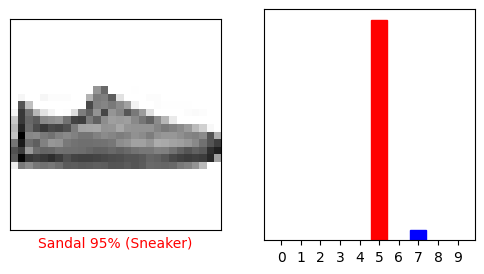

In [91]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

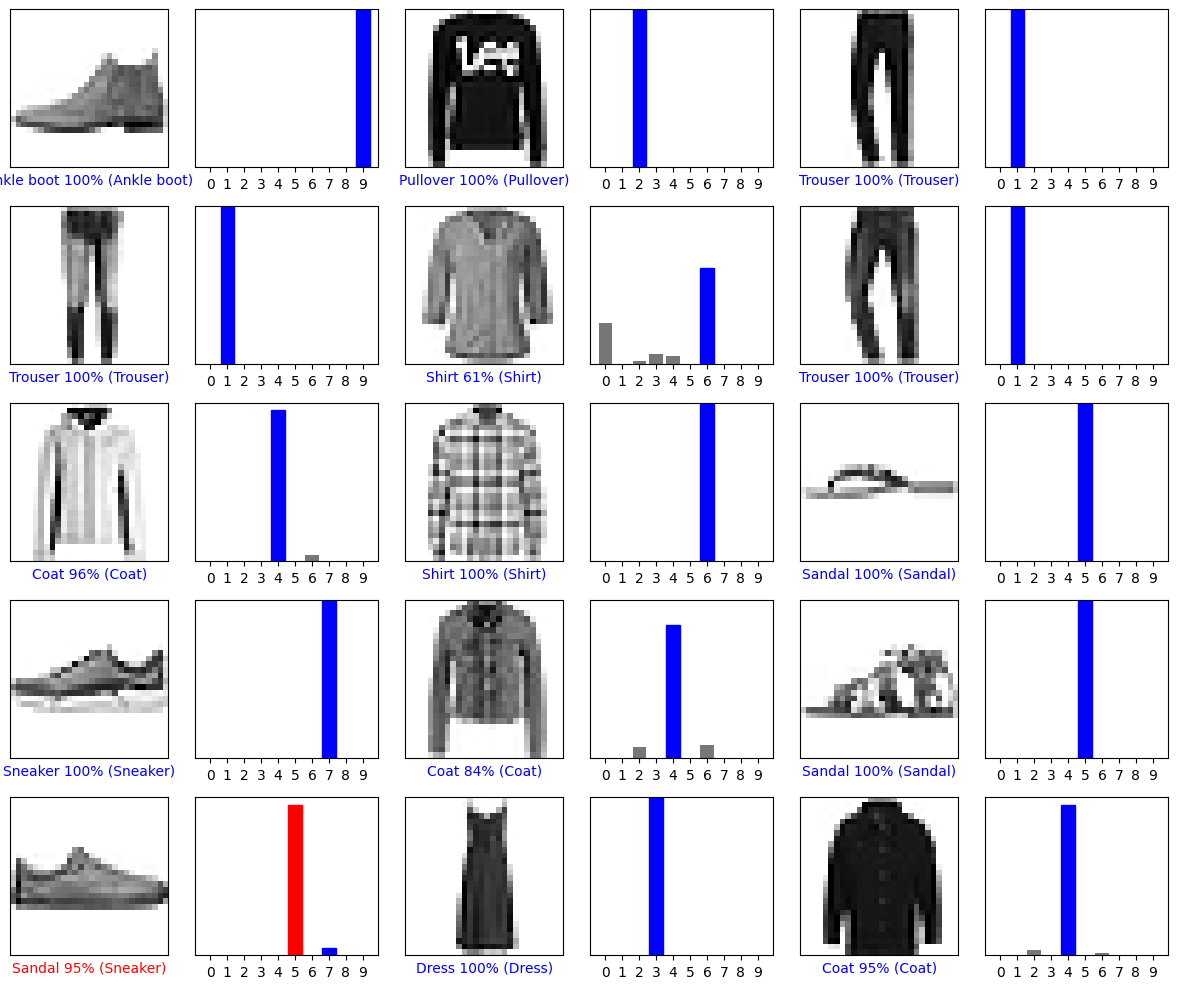

In [92]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [93]:
img = test_images[1]
print(img.shape)

(28, 28)


In [94]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [95]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[4.1920022e-05 3.2802181e-12 9.9753129e-01 2.9183090e-13 2.0806124e-03
  9.5111991e-12 3.4617644e-04 9.8605492e-19 3.0361529e-09 5.3456572e-16]]


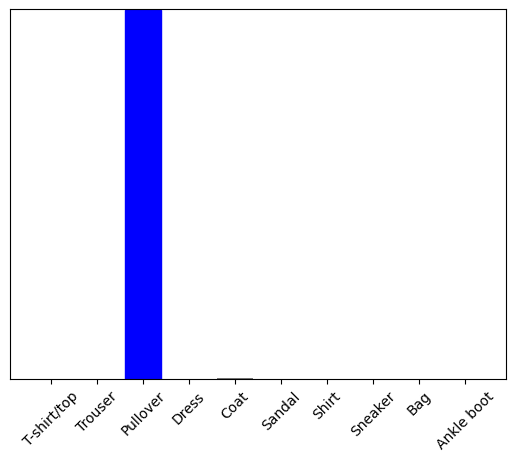

In [96]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [97]:
np.argmax(predictions_single[0])

np.int64(2)

In [98]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [99]:
%tensorboard --logdir logs/fashion-mnist/fit

Reusing TensorBoard on port 6007 (pid 13068), started 0:07:37 ago. (Use '!kill 13068' to kill it.)